In [2]:
#importing the Train Dataset
import pandas as pd
train_csv=pd.read_csv("Titanic_train.csv")
train_csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#finding the null values
train_csv.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_csv.fillna(train_csv.mean(),inplace=True)
train_csv.isnull().sum()

C:\Users\HARI BABU CHOUDHARY\AppData\Local\Temp\ipykernel_12684\2478163086.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_csv.fillna(train_csv.mean(),inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#findig the categorical columns
mode_value=train_csv['Cabin'].mode()[0].split()[0]
train_csv['Cabin'].fillna(mode_value,inplace=True)
mode_value=train_csv['Embarked'].mode()[0]
train_csv['Embarked'].fillna(mode_value,inplace=True)
train_csv.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

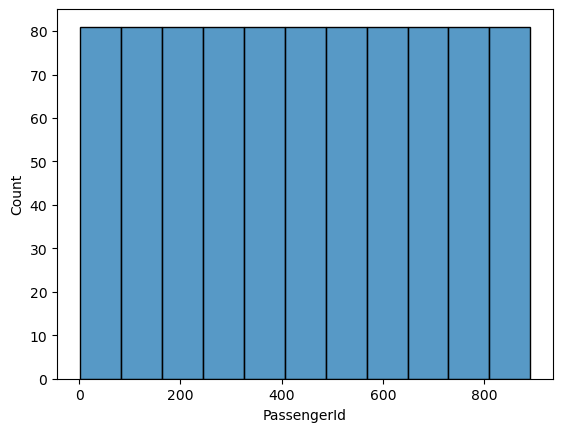

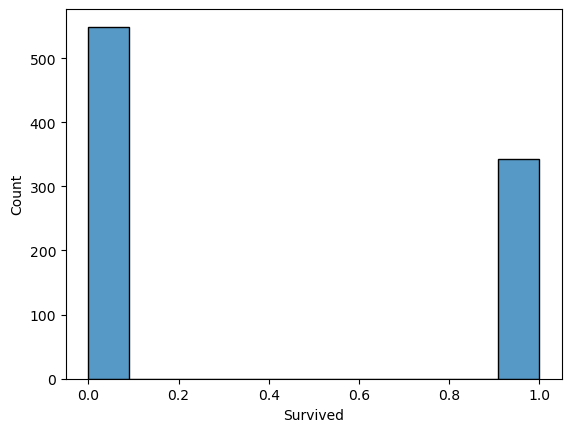

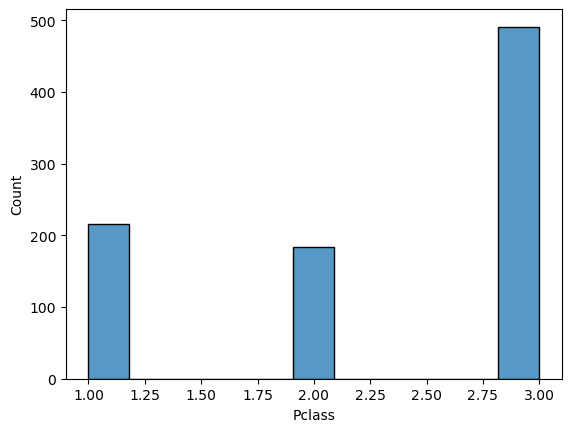

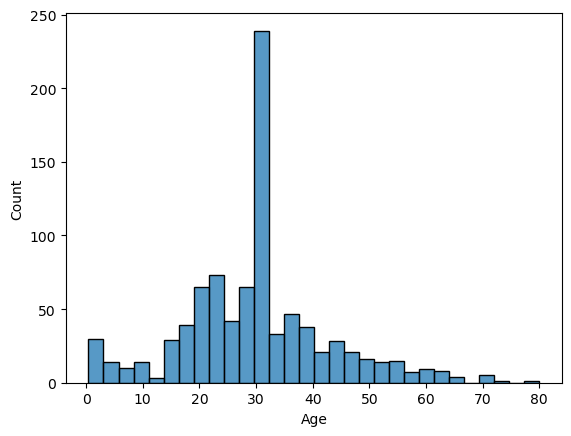

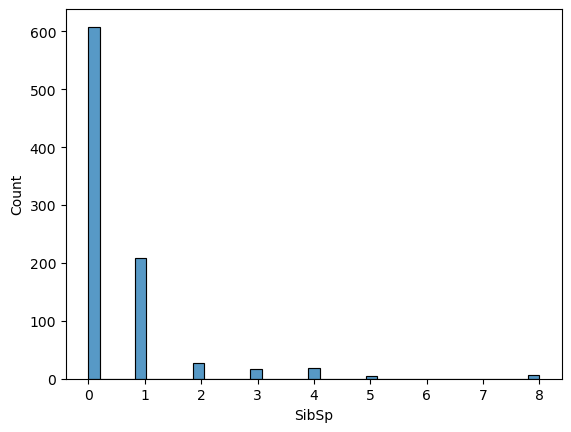

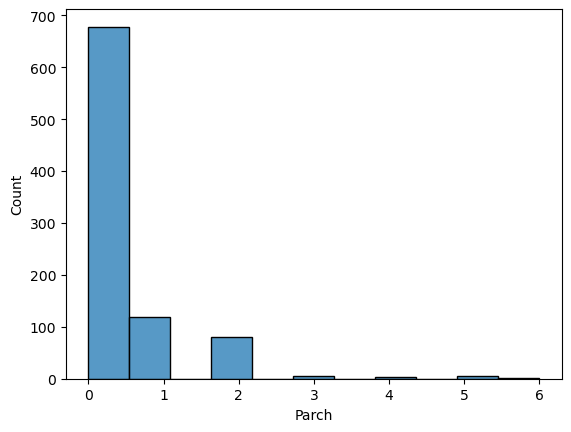

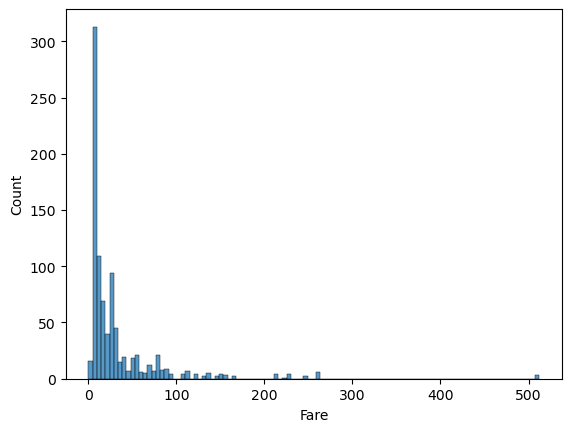

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in train_csv.select_dtypes(include='number').columns:
    sns.histplot(data=train_csv,x=i)
    plt.show()

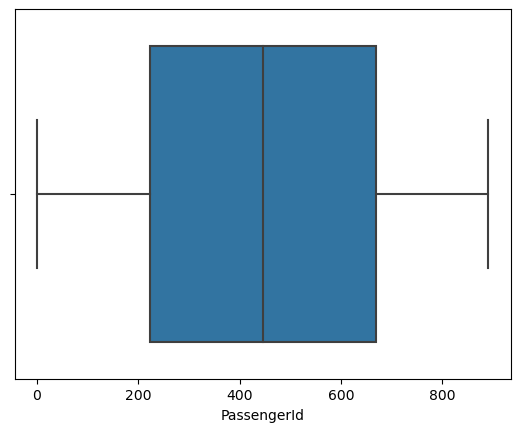

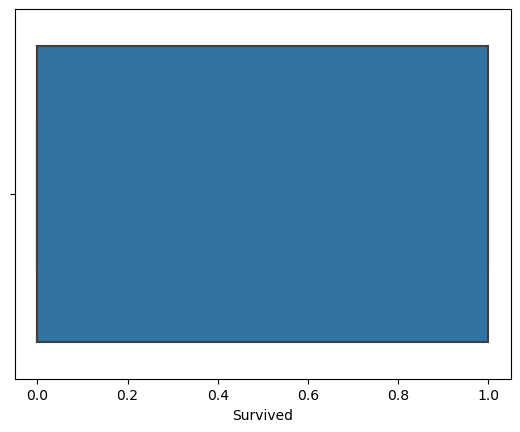

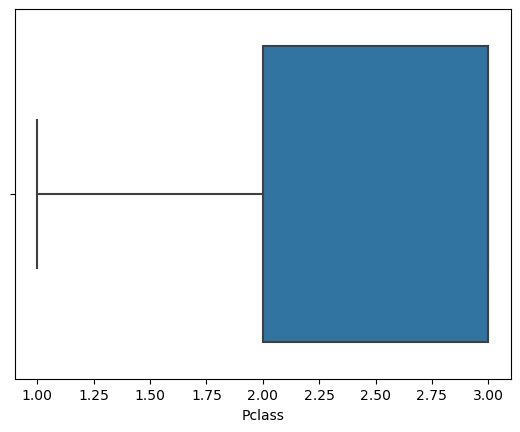

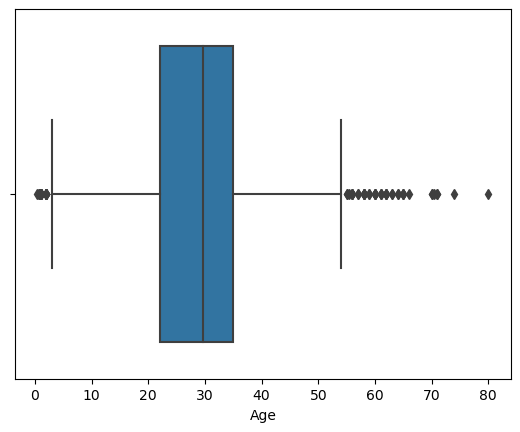

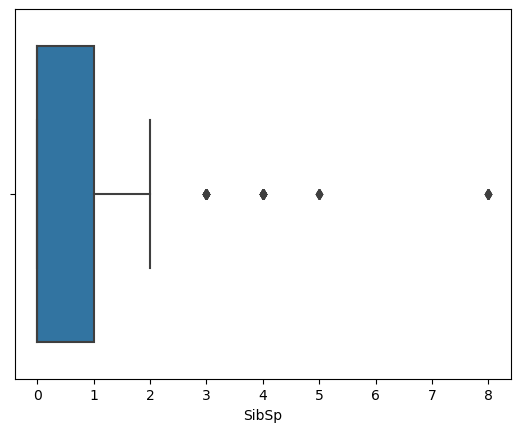

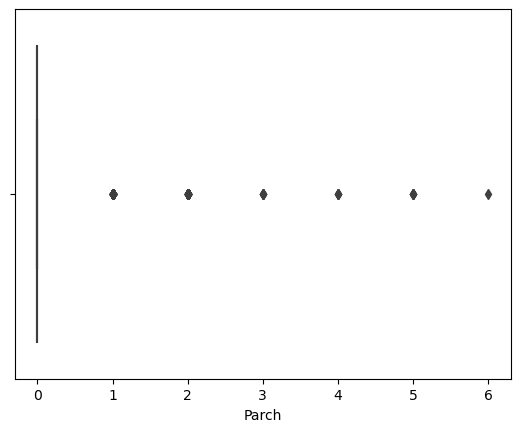

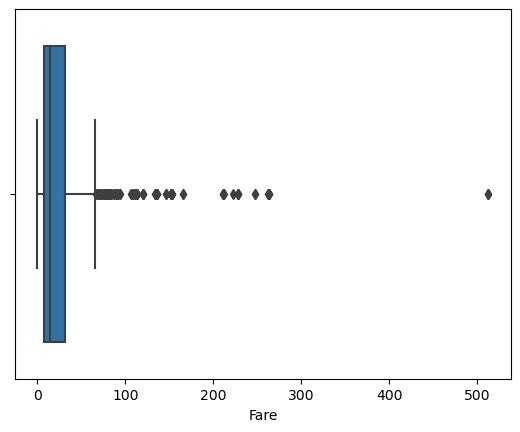

In [9]:
for i in train_csv.select_dtypes(include='number').columns:
    sns.boxplot(data=train_csv,x=i)
    plt.show()

In [107]:
from sklearn.preprocessing import LabelEncoder
LR=LabelEncoder()
train_csv['Sex']=LR.fit_transform(train_csv['Sex'])
train_csv['Embarked']=LR.fit_transform(train_csv['Embarked'])
train_csv['Cabin']=LR.fit_transform(train_csv['Cabin'])
train_csv['Ticket']=LR.fit_transform(train_csv['Ticket'])

In [61]:
train_cont=train_csv.drop(train_csv.columns[[3,4,8,10,11]],axis=True)
train_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [62]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X  = SS.fit_transform(train_cont)
SS_X  = pd.DataFrame(SS_X)
SS_X.columns= list(train_cont)
SS_X

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,-0.789272,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.726220,1.266990,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,-1.722332,1.266990,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.718444,1.266990,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,-1.714556,-0.789272,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,1.718444,1.266990,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,1.722332,-0.789272,0.827377,0.000000,0.432793,2.008933,-0.176263
889,1.726220,1.266990,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [63]:
train_csv['Ticket'].value_counts()

333    7
568    7
80     7
249    6
566    6
      ..
513    1
98     1
212    1
606    1
466    1
Name: Ticket, Length: 681, dtype: int64

In [64]:
#data partitioning
x_train=train_csv.drop(train_csv.columns[[1,3]],axis=1)


In [65]:
y_train=train_csv['Survived']

In [66]:
#importing the test dataset
test_csv=pd.read_csv("Titanic_test.csv")
test_csv

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [68]:
test_csv.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [70]:
#filling the Null values using impulation
test_csv['Age'].fillna(test_csv['Age'].mean(),inplace=True)
test_csv['Fare'].fillna(test_csv['Fare'].mean(),inplace=True)

In [71]:
mode_value=test_csv['Cabin'].mode()[0].split()[0]
test_csv['Cabin'].fillna(mode_value,inplace=True)

In [72]:
test_csv.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

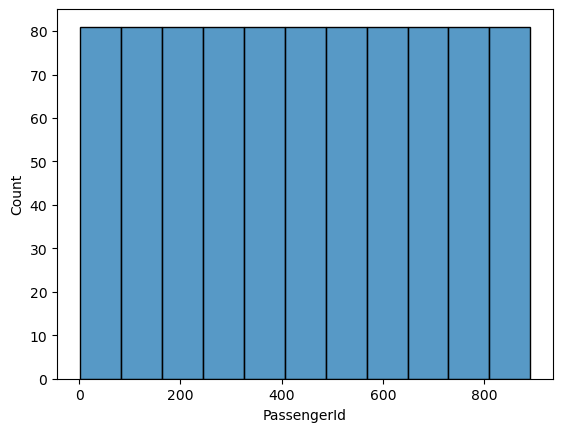

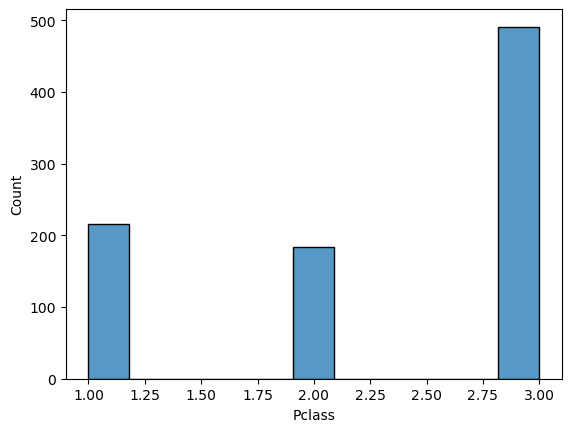

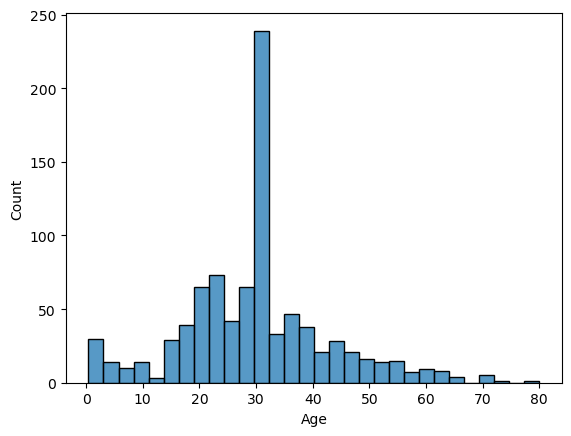

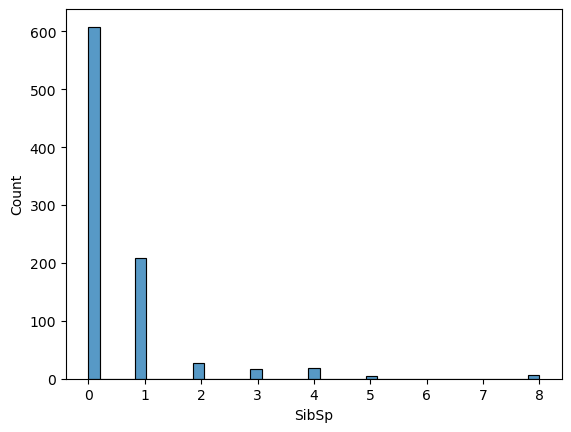

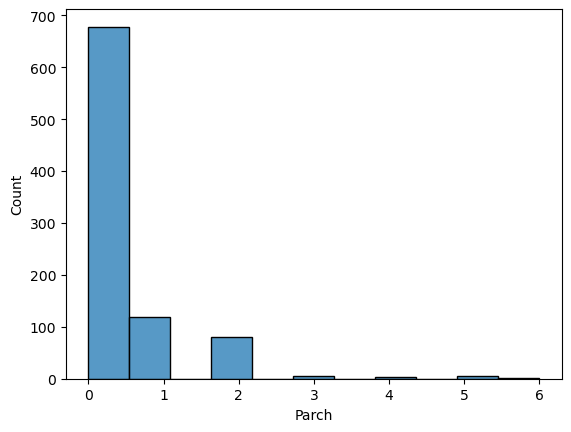

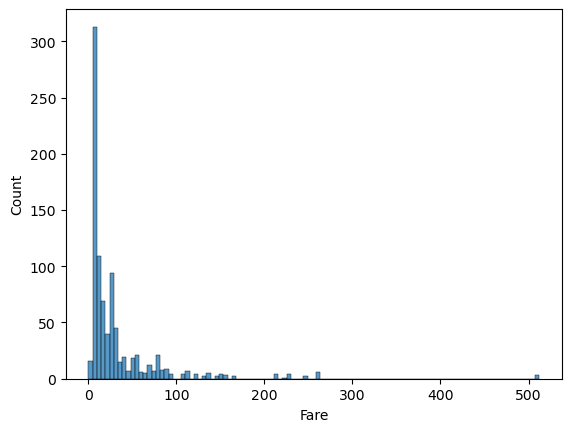

In [73]:
for i in test_csv.select_dtypes(include='number').columns:
    sns.histplot(data=train_csv,x=i)
    plt.show()

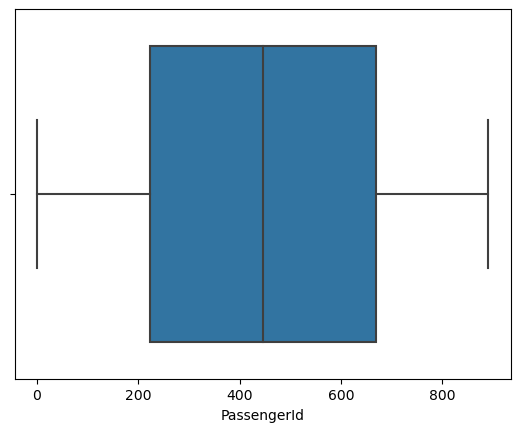

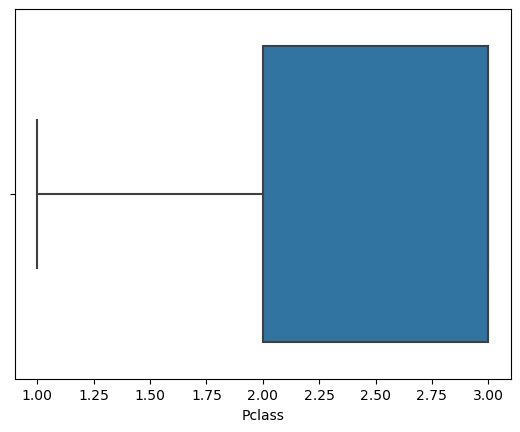

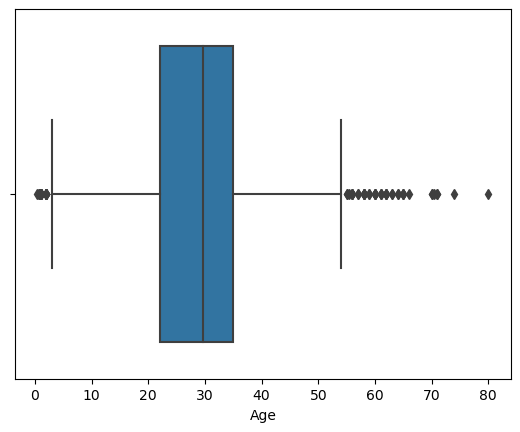

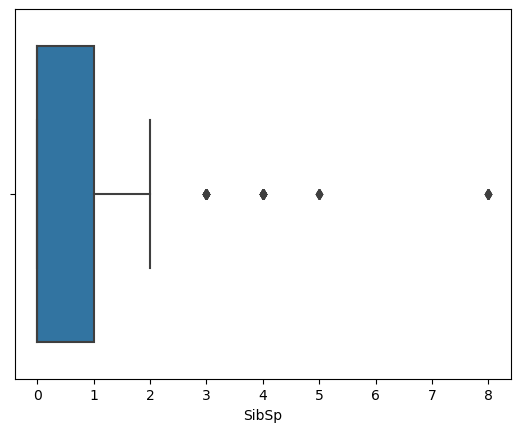

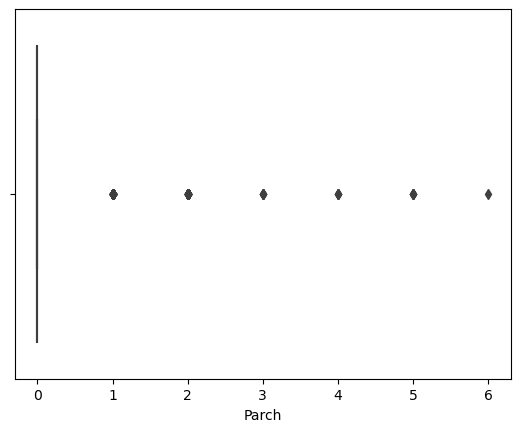

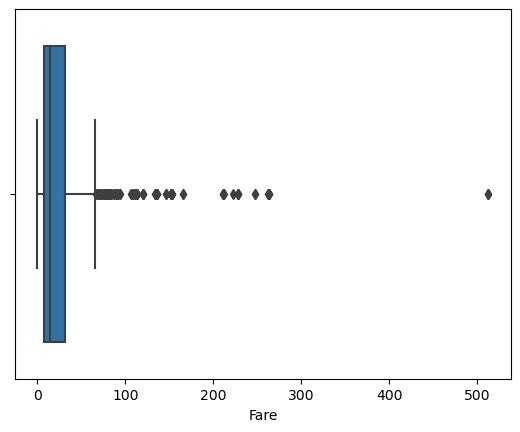

In [74]:
for i in test_csv.select_dtypes(include='number').columns:
    sns.boxplot(data=train_csv,x=i)
    plt.show()

In [108]:
from sklearn.preprocessing import LabelEncoder
LR=LabelEncoder()
test_csv['Sex']=LR.fit_transform(test_csv['Sex'])
test_csv['Embarked']=LR.fit_transform(test_csv['Embarked'])
test_csv['Cabin']=LR.fit_transform(test_csv['Cabin'])
test_csv['Ticket']=LR.fit_transform(test_csv['Ticket'])


In [109]:
test_cont=test_csv.drop(test_csv.columns[[2,3,7,9,10]],axis=True)
test_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [110]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X  = SS.fit_transform(test_cont)
SS_X  = pd.DataFrame(SS_X)
SS_X.columns= list(test_cont)
SS_X

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.727912,0.873482,0.334993,-0.499470,-0.400248,-0.498407
1,-1.719625,0.873482,1.325530,0.616992,-0.400248,-0.513274
2,-1.711337,-0.315819,2.514175,-0.499470,-0.400248,-0.465088
3,-1.703050,0.873482,-0.259330,-0.499470,-0.400248,-0.483466
4,-1.694763,0.873482,-0.655545,0.616992,0.619896,-0.418471
...,...,...,...,...,...,...
413,1.694763,0.873482,0.000000,-0.499470,-0.400248,-0.494448
414,1.703050,-1.505120,0.691586,-0.499470,-0.400248,1.313753
415,1.711337,0.873482,0.651965,-0.499470,-0.400248,-0.508792
416,1.719625,0.873482,0.000000,-0.499470,-0.400248,-0.494448


In [111]:
x_test=test_csv.drop(test_csv.columns[2],axis=True)

In [112]:
x_train.shape

(891, 10)

In [113]:
x_test.shape

(418, 10)

In [114]:
y_train.shape

(891,)

In [116]:
#fitting the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train,y_train)

Y_pred_train = logreg.predict(x_train)
Y_pred_test=logreg.predict(x_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
logreg.predict_proba(x_train)[:,1:] # 1- prb, prob


array([[0.07257776],
       [0.81050907],
       [0.45881486],
       [0.66029416],
       [0.08110422],
       [0.10782785],
       [0.53577888],
       [0.07546803],
       [0.56145356],
       [0.6560811 ],
       [0.91947631],
       [0.54288003],
       [0.10243015],
       [0.13464728],
       [0.54051265],
       [0.45080635],
       [0.06665093],
       [0.12576494],
       [0.41930111],
       [0.55814583],
       [0.13058426],
       [0.37247994],
       [0.58440179],
       [0.09928112],
       [0.39532769],
       [0.58585132],
       [0.12619092],
       [0.6745215 ],
       [0.51830864],
       [0.09372803],
       [0.15985477],
       [0.81187272],
       [0.51832186],
       [0.05900865],
       [0.23025343],
       [0.13833023],
       [0.12612866],
       [0.1033927 ],
       [0.40162875],
       [0.56235948],
       [0.34549655],
       [0.52478152],
       [0.11955087],
       [0.74404672],
       [0.57021513],
       [0.08687315],
       [0.08268497],
       [0.541

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train,Y_pred_train)
cm

array([[464,  85],
       [108, 234]], dtype=int64)

In [122]:
ac = accuracy_score(y_train,Y_pred_train)
print("Accurcy score:", np.round(ac,2))

Accurcy score: 0.78


In [124]:
from sklearn.metrics import recall_score,precision_score, f1_score
sensitivity = recall_score(y_train,Y_pred_train)
print("sensitivity score:", np.round(sensitivity,2))

sensitivity score: 0.68


In [126]:
precision = precision_score(y_train,Y_pred_train)
print("precision score:", np.round(precision,2))

precision score: 0.73


In [127]:
TN =cm[0,0]
FP = cm[0,1]
TNR = TN/(TN + FP)
print("specificity score:", np.round(TNR,2))

specificity score: 0.85


In [129]:
f1score = f1_score(y_train,Y_pred_train)
print("F1 score:", np.round(f1score,2))

F1 score: 0.71


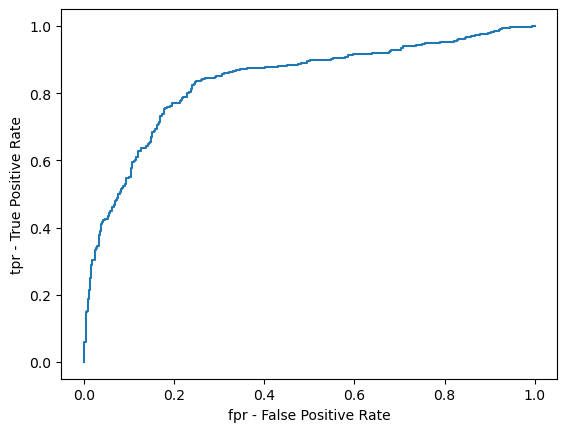

In [131]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr,dummy  = roc_curve(y_train,logreg.predict_proba(x_train)[:,1:])

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.ylabel('tpr - True Positive Rate')
plt.xlabel('fpr - False Positive Rate')
plt.show()

In [132]:
auc = roc_auc_score(y_train, logreg.predict_proba(x_train)[:,1:])
auc
print("Area under curve value:", np.round(auc,2))

Area under curve value: 0.84


# Interview Questions

1.What is the difference between precision and recall?

Precision and recall are metrics used to measure how well a model performs in classification tasks:

Precision: The proportion of positive predictions that are actually correct

Recall: The proportion of actual positive instances that are identified by the mode

2.What is cross-validation, and why is it important in binary classification?

Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds.